In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
%matplotlib inline

In [5]:
cleaned_obs = pd.read_csv("clean.csv")
cleaned_obs.head()

,id,subjid,sex,agedays,param,measurement,clean_value
0,1,46663895,0,2970,HEIGHTCM,121.920000,Include
1,2,46663895,0,3776,HEIGHTCM,152.400000,Include
2,3,46663895,0,2970,WEIGHTKG,24.494239,Include
3,4,46663895,0,3776,WEIGHTKG,40.823732,Include
4,5,46668331,0,2959,HEIGHTCM,116.840000,Include


In [6]:
cutoff_values = cleaned_obs[cleaned_obs.clean_value == 'Exclude-SD-Cutoff']
cutoff_weights = cutoff_values[cutoff_values.param == 'HEIGHTCM']
cutoff_weights.head()

,id,subjid,sex,agedays,param,measurement,clean_value
75,76,46685134,1,3272,HEIGHTCM,30.48,Exclude-SD-Cutoff
77,78,46685134,1,3620,HEIGHTCM,30.48,Exclude-SD-Cutoff
2119,2120,46762118,1,2504,HEIGHTCM,30.48,Exclude-SD-Cutoff
2399,2400,46768145,1,998,HEIGHTCM,193.04,Exclude-SD-Cutoff
3186,3187,46781884,0,1920,HEIGHTCM,256.54,Exclude-SD-Cutoff


In [7]:
someone = cleaned_obs[cleaned_obs.subjid == 46762118]
someone.head()

,id,subjid,sex,agedays,param,measurement,clean_value
2118,2119,46762118,1,1937,HEIGHTCM,109.220000,Exclude-Min-Height-Change
2119,2120,46762118,1,2504,HEIGHTCM,30.480000,Exclude-SD-Cutoff
2120,2121,46762118,1,2637,HEIGHTCM,106.680000,Exclude-Too-Many-Errors
2121,2122,46762118,1,1937,WEIGHTKG,17.236687,Exclude-Too-Many-Errors-Other-Parameter
2122,2123,46762118,1,2504,WEIGHTKG,4.535970,Exclude-SD-Cutoff


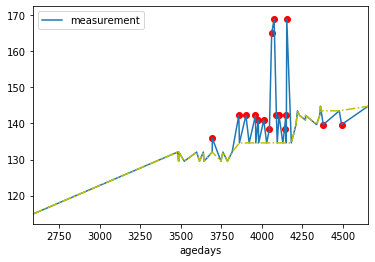

In [8]:
actual_person = cleaned_obs[cleaned_obs.subjid == 47085108]
heights = actual_person[actual_person.param == 'HEIGHTCM']
sorted_heights = heights.sort_values('agedays')
excluded_heights = sorted_heights[sorted_heights.clean_value != 'Include']
included_heights = sorted_heights[sorted_heights.clean_value == 'Include']
height_plot = sorted_heights.plot.line(x='agedays', y='measurement')
height_plot.plot(included_heights['agedays'], included_heights['measurement'], c='y', linestyle='-.')
height_plot.scatter(x=excluded_heights.agedays, y=excluded_heights.measurement, c='r')


In [9]:
grouped_obs = cleaned_obs.groupby('subjid')

In [10]:
grouped_obs.size().sort_values(ascending=False).head(15)

subjid
47085108    100
46793195     96
47058401     78
46798182     68
46852142     66
47058419     66
47095761     64
46824832     62
46862367     62
46801919     58
46879297     58
46845931     58
46861621     56
46964114     56
46804266     54
dtype: int64

In [11]:
heights.head()

,id,subjid,sex,agedays,param,measurement,clean_value
78704,78705,47085108,1,2589,HEIGHTCM,114.935,Include
78705,78706,47085108,1,3480,HEIGHTCM,132.080,Include
78706,78707,47085108,1,3486,HEIGHTCM,129.540,Include
78707,78708,47085108,1,3487,HEIGHTCM,132.080,Include
78708,78709,47085108,1,3521,HEIGHTCM,129.540,Include


In [12]:
included_heights['measurement']

78704    114.935
78705    132.080
78706    129.540
78707    132.080
78708    129.540
78709    132.080
78710    129.540
78711    132.080
78712    129.540
78713    132.080
78715    129.540
78716    132.080
78717    129.540
78718    132.080
78720    134.620
78722    134.620
78724    134.620
78726    134.620
78728    134.620
78733    134.620
78735    134.620
78738    134.620
78740    134.620
78741    139.700
78742    143.510
78743    142.240
78744    140.970
78745    142.240
78746    139.700
78747    142.240
78748    144.780
78749    143.510
78751    143.510
78753    144.780
Name: measurement, dtype: float64

In [13]:
multi_clean = pd.read_csv("clean.csv", index_col = ['subjid', 'param', 'agedays'])

In [14]:
multi_clean.head(50)


id  sex  measurement                clean_value
subjid   param    agedays                                                 
46663895 HEIGHTCM 2970      1    0   121.920000                    Include
                  3776      2    0   152.400000                    Include
         WEIGHTKG 2970      3    0    24.494239                    Include
                  3776      4    0    40.823732                    Include
46668331 HEIGHTCM 2959      5    0   116.840000                    Include
                  3330      6    0   137.160000                    Include
         WEIGHTKG 2959      7    0     4.535970          Exclude-SD-Cutoff
                  3330      8    0    33.112583                    Include
46674904 HEIGHTCM 2931      9    0   121.920000                    Include
         WEIGHTKG 2931     10    0    31.751792                    Include
46676914 HEIGHTCM 2078     11    1   116.840000                    Include
                  2350     12    1   122.428000                    Include
                  2797     13    1   130.048000                    Include
         WEIGHTKG 2078     14    1    25.401433                    Include
                  2350     15    1    25.401433    Exclude-Carried-Forward
                  2797     16    1    29.030210                    Include
46677202 HEIGHTCM 2799     17    1   129.540000  Exclude-Min-Height-Change
                  2882     18    1   126.365000                    Include
                  3166     19    1   130.810000                    Include
                  3346     20    1   129.540000                    Include
                  3533     21    1   135.128000                    Include
                  4275     22    1   146.050000                    Include
                  4646     23    1   157.480000                    Include
                  5011     24    1   162.560000                    Include
         WEIGHTKG 2799     25    1    34.019777                    Include
                  2882     26    1    34.700172                    Include
                  3166     27    1    36.287762                    Include
                  3346     28    1    39.462941                    Include
                  3533     29    1    43.545314                    Include
                  4275     30    1    55.452236                    Include
                  4646     31    1    59.874807                    Include
                  5011     32    1    68.039554                    Include
46677598 HEIGHTCM 1999     33    0   112.395000                    Include
                  2487     34    0   116.840000                    Include
         WEIGHTKG 1999     35    0    19.051075                    Include
                  2487     36    0    21.319060                    Include
46677652 HEIGHTCM 1262     37    0    97.155000                    Include
                  1630     38    0   101.600000                    Include
                  2450     39    0   114.808000                    Include
                  3019     40    0   125.730000                    Include
                  3374     41    0   131.318000                    Include
         WEIGHTKG 1262     42    0    14.288306                    Include
                  1630     43    0    17.009888                    Include
                  2450     44    0    21.772657                    Include
                  3019     45    0    25.855030                    Include
                  3374     46    0    28.123016                    Include
46678714 HEIGHTCM 743      47    0    91.440000                    Include
                  1112     48    0   102.870000                    Include
         WEIGHTKG 743      49    0    11.793523                    Include
                  1112     50    0    13.607911                    Include

In [15]:
cleaned_obs[(cleaned_obs.agedays > 2900) & (cleaned_obs.agedays < 3000) & (cleaned_obs.param == 'HEIGHTCM')].describe()

,id,subjid,sex,agedays,measurement
count,1181.000000,1.181000e+03,1181.000000,1181.000000,1181.000000
mean,41215.215919,4.692849e+07,0.452159,2950.657917,130.008404
std,25103.649205,1.014102e+05,0.497917,28.353307,14.593957
min,1.000000,4.666390e+07,0.000000,2901.000000,30.480000
25%,19852.000000,4.684903e+07,0.000000,2927.000000,124.460000
50%,39219.000000,4.691846e+07,0.000000,2952.000000,129.000000
75%,64105.000000,4.701618e+07,1.000000,2974.000000,133.350000
max,87868.000000,4.713096e+07,1.000000,2999.000000,320.040000


In [16]:
cleaned_obs.loc[cleaned_obs.param == 'WEIGHTKG', ['clean_value']].groupby('clean_value')

In [17]:
cleaned_obs['clean_cat'] = cleaned_obs['clean_value'].astype('category')

In [18]:
cleaned_obs.loc[cleaned_obs.param == 'WEIGHTKG'].clean_cat.value_counts()

Include                                    42952
Exclude-EWMA-Extreme                         211
Exclude-SD-Cutoff                            165
Exclude-EWMA-8                               154
Exclude-EWMA-9                               101
Exclude-Too-Many-Errors-Other-Parameter       77
Exclude-Carried-Forward                       72
Exclude-Too-Many-Errors                       63
Exclude-EWMA-Extreme-Pair                     59
Exclude-Single-Outlier                        58
Exclude-EWMA-11                               13
Exclude-Pair-Delta-17                          9
Exclude-Pair-Delta-18                          5
Exclude-EWMA-12                                1
Exclude-Min-Height-Change                      0
Exclude-EWMA-13                                0
Exclude-Max-Height-Change                      0
Name: clean_cat, dtype: int64

In [19]:
import seaborn as sns

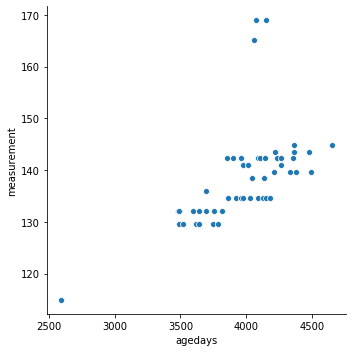

In [20]:
sns.relplot(x='agedays', y='measurement', data=heights)

In [21]:
actual_person.head()

,id,subjid,sex,agedays,param,measurement,clean_value
78704,78705,47085108,1,2589,HEIGHTCM,114.935,Include
78705,78706,47085108,1,3480,HEIGHTCM,132.080,Include
78706,78707,47085108,1,3486,HEIGHTCM,129.540,Include
78707,78708,47085108,1,3487,HEIGHTCM,132.080,Include
78708,78709,47085108,1,3521,HEIGHTCM,129.540,Include


In [22]:
cleaned_obs['age'] = cleaned_obs['agedays'] / 365

In [23]:
cleaned_obs['include'] = cleaned_obs.clean_value.eq("Include")

In [24]:
cleaned_obs.head(50)

,id,subjid,sex,agedays,param,measurement,clean_value,clean_cat,age,include
0,1,46663895,0,2970,HEIGHTCM,121.920000,Include,Include,8.136986,True
1,2,46663895,0,3776,HEIGHTCM,152.400000,Include,Include,10.345205,True
2,3,46663895,0,2970,WEIGHTKG,24.494239,Include,Include,8.136986,True
3,4,46663895,0,3776,WEIGHTKG,40.823732,Include,Include,10.345205,True
4,5,46668331,0,2959,HEIGHTCM,116.840000,Include,Include,8.106849,True
5,6,46668331,0,3330,HEIGHTCM,137.160000,Include,Include,9.123288,True
6,7,46668331,0,2959,WEIGHTKG,4.535970,Exclude-SD-Cutoff,Exclude-SD-Cutoff,8.106849,False
7,8,46668331,0,3330,WEIGHTKG,33.112583,Include,Include,9.123288,True
8,9,46674904,0,2931,HEIGHTCM,121.920000,Include,Include,8.030137,True
9,10,46674904,0,2931,WEIGHTKG,31.751792,Include,Include,8.030137,True


In [25]:
actual_person = cleaned_obs[cleaned_obs.subjid == 47085108]
actual_person.head()

,id,subjid,sex,agedays,param,measurement,clean_value,clean_cat,age,include
78704,78705,47085108,1,2589,HEIGHTCM,114.935,Include,Include,7.093151,True
78705,78706,47085108,1,3480,HEIGHTCM,132.080,Include,Include,9.534247,True
78706,78707,47085108,1,3486,HEIGHTCM,129.540,Include,Include,9.550685,True
78707,78708,47085108,1,3487,HEIGHTCM,132.080,Include,Include,9.553425,True
78708,78709,47085108,1,3521,HEIGHTCM,129.540,Include,Include,9.646575,True


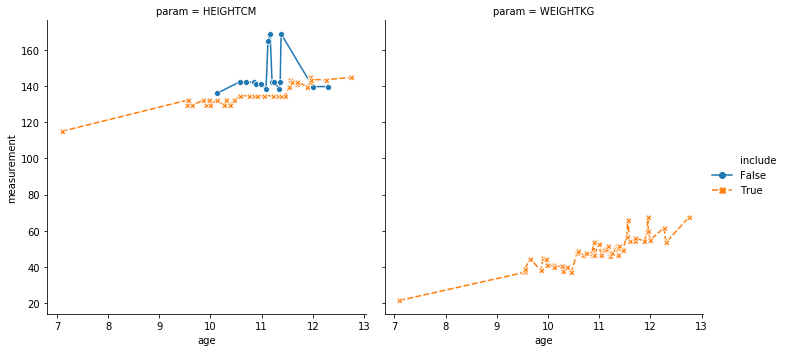

In [26]:
sns.relplot(x='age', y='measurement', col='param', hue='include', style='include', kind='line', markers=True, data=actual_person)

In [27]:
ids = cleaned_obs['subjid'].unique()

In [36]:
cleaned_obs.groupby(['subjid', 'agedays', 'param']).count()

id  sex  measurement  clean_value  clean_cat  age  \
subjid   agedays param                                                         
46663895 2970    HEIGHTCM   1    1            1            1          1    1   
                 WEIGHTKG   1    1            1            1          1    1   
         3776    HEIGHTCM   1    1            1            1          1    1   
                 WEIGHTKG   1    1            1            1          1    1   
46668331 2959    HEIGHTCM   1    1            1            1          1    1   
...                        ..  ...          ...          ...        ...  ...   
47130959 3780    WEIGHTKG   1    1            1            1          1    1   
         3847    HEIGHTCM   1    1            1            1          1    1   
                 WEIGHTKG   1    1            1            1          1    1   
         4027    HEIGHTCM   1    1            1            1          1    1   
                 WEIGHTKG   1    1            1            1          1    1   

                           include  
subjid   agedays param              
46663895 2970    HEIGHTCM        1  
                 WEIGHTKG        1  
         3776    HEIGHTCM        1  
                 WEIGHTKG        1  
46668331 2959    HEIGHTCM        1  
...                            ...  
47130959 3780    WEIGHTKG        1  
         3847    HEIGHTCM        1  
                 WEIGHTKG        1  
         4027    HEIGHTCM        1  
                 WEIGHTKG        1  

[87880 rows x 7 columns]

In [32]:
ids.size

8289

In [38]:
cleaned_obs['height'] = np.where(cleaned_obs['param'] == 'HEIGHTCM', cleaned_obs['measurement'], np.NaN)

In [41]:
cleaned_obs.head(20)

,id,subjid,sex,agedays,param,measurement,clean_value,clean_cat,age,include,height,weight
0,1,46663895,0,2970,HEIGHTCM,121.920000,Include,Include,8.136986,True,121.920,NaN
1,2,46663895,0,3776,HEIGHTCM,152.400000,Include,Include,10.345205,True,152.400,NaN
2,3,46663895,0,2970,WEIGHTKG,24.494239,Include,Include,8.136986,True,NaN,24.494239
3,4,46663895,0,3776,WEIGHTKG,40.823732,Include,Include,10.345205,True,NaN,40.823732
4,5,46668331,0,2959,HEIGHTCM,116.840000,Include,Include,8.106849,True,116.840,NaN
5,6,46668331,0,3330,HEIGHTCM,137.160000,Include,Include,9.123288,True,137.160,NaN
6,7,46668331,0,2959,WEIGHTKG,4.535970,Exclude-SD-Cutoff,Exclude-SD-Cutoff,8.106849,False,NaN,4.535970
7,8,46668331,0,3330,WEIGHTKG,33.112583,Include,Include,9.123288,True,NaN,33.112583
8,9,46674904,0,2931,HEIGHTCM,121.920000,Include,Include,8.030137,True,121.920,NaN
9,10,46674904,0,2931,WEIGHTKG,31.751792,Include,Include,8.030137,True,NaN,31.751792


In [40]:
cleaned_obs['weight'] = np.where(cleaned_obs['param'] == 'WEIGHTKG', cleaned_obs['measurement'], np.NaN)

In [44]:
heights = cleaned_obs[cleaned_obs.param == 'HEIGHTCM'] 

In [43]:
weights = cleaned_obs[cleaned_obs.param == 'WEIGHTKG']

In [46]:
merged = heights.merge(weights, on=['subjid', 'agedays', 'sex'], how='outer')

In [50]:
only_needed_columns = merged.drop(columns=['param_x', 'measurement_x', 'clean_value_x', 'age_x', 'weight_x', 
                     'id_y', 'param_y', 'measurement_y', 'clean_value_y', 'height_y'])

In [51]:
only_needed_columns.head()

,id_x,subjid,sex,agedays,clean_cat_x,include_x,height_x,clean_cat_y,age_y,include_y,weight_y
0,1,46663895,0,2970,Include,True,121.92,Include,8.136986,True,24.494239
1,2,46663895,0,3776,Include,True,152.40,Include,10.345205,True,40.823732
2,5,46668331,0,2959,Include,True,116.84,Exclude-SD-Cutoff,8.106849,False,4.535970
3,6,46668331,0,3330,Include,True,137.16,Include,9.123288,True,33.112583
4,9,46674904,0,2931,Include,True,121.92,Include,8.030137,True,31.751792


In [52]:
clean_column_names = only_needed_columns.rename(columns={'clean_cat_x': 'height_cat', 'include_x': 'include_height',
                                                        'height_x': 'height', 'clean_cat_y': 'weight_cat',
                                                        'age_y': 'age', 'include_y': 'include_weight', 
                                                         'weight_y': 'weight'})

In [53]:
clean_column_names.head()

,id_x,subjid,sex,agedays,height_cat,include_height,height,weight_cat,age,include_weight,weight
0,1,46663895,0,2970,Include,True,121.92,Include,8.136986,True,24.494239
1,2,46663895,0,3776,Include,True,152.40,Include,10.345205,True,40.823732
2,5,46668331,0,2959,Include,True,116.84,Exclude-SD-Cutoff,8.106849,False,4.535970
3,6,46668331,0,3330,Include,True,137.16,Include,9.123288,True,33.112583
4,9,46674904,0,2931,Include,True,121.92,Include,8.030137,True,31.751792


In [56]:
clean_column_names['bmi'] = clean_column_names['weight'] / ((clean_column_names['height'] / 100) ** 2)

In [57]:
clean_column_names.head()

,id_x,subjid,sex,agedays,height_cat,include_height,height,weight_cat,age,include_weight,weight,bmi
0,1,46663895,0,2970,Include,True,121.92,Include,8.136986,True,24.494239,16.478362
1,2,46663895,0,3776,Include,True,152.40,Include,10.345205,True,40.823732,17.576920
2,5,46668331,0,2959,Include,True,116.84,Exclude-SD-Cutoff,8.106849,False,4.535970,3.322669
3,6,46668331,0,3330,Include,True,137.16,Include,9.123288,True,33.112583,17.601031
4,9,46674904,0,2931,Include,True,121.92,Include,8.030137,True,31.751792,21.360840


In [58]:
bmi_percentiles = pd.read_csv("bmiagerev.csv")
bmi_percentiles.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P85,P90,P95,P97
0,1,24,-2.01118107,16.57502768,0.080592465,14.52095333,14.73731947,15.09032827,15.74164233,16.57502768,17.55718781,18.16219473,18.60948128,19.33801062,19.85985812
1,1,24.5,-1.982373595,16.54777487,0.080127429,14.50347667,14.71929257,15.07117474,15.71962876,16.54777487,17.52129279,18.11954923,18.56110634,19.27889813,19.79194014
2,1,25.5,-1.924100169,16.49442763,0.079233994,14.46882381,14.68360841,15.03335725,15.67634464,16.49442763,17.45135039,18.03668013,18.46729593,19.16465965,19.66102345
3,1,26.5,-1.86549793,16.44259552,0.078389356,14.43459737,14.64843329,14.99619505,15.634035,16.44259552,17.38383656,17.95700228,18.37736191,19.05567423,19.5365754
4,1,27.5,-1.807261899,16.3922434,0.077593501,14.40082828,14.61378626,14.95969047,15.5926798,16.3922434,17.3187102,17.88047101,18.29125345,18.9518675,19.41848805


In [59]:
actual_person = clean_column_names[clean_column_names.subjid == 47085108]
actual_person.head()

,id_x,subjid,sex,agedays,height_cat,include_height,height,weight_cat,age,include_weight,weight,bmi
39352,78705,47085108,1,2589,Include,True,114.935,Include,7.093151,True,21.432459,16.224354
39353,78706,47085108,1,3480,Include,True,132.080,Include,9.534247,True,36.922798,21.165108
39354,78707,47085108,1,3486,Include,True,129.540,Include,9.550685,True,37.648553,22.435745
39355,78708,47085108,1,3487,Include,True,132.080,Include,9.553425,True,39.009344,22.361170
39356,78709,47085108,1,3521,Include,True,129.540,Include,9.646575,True,44.565908,26.557976


In [69]:
bmi_percentiles['age'] = bmi_percentiles['Agemos'] / 12

In [72]:
bmi_percentiles.dtypes

Sex        object
Agemos    float64
L          object
M          object
S          object
P3         object
P5        float64
P10        object
P25        object
P50        object
P75        object
P85        object
P90        object
P95       float64
P97        object
age       float64
dtype: object

In [67]:
bmi_percentiles['Agemos'] = pd.to_numeric(bmi_percentiles['Agemos'], errors='coerce')

In [71]:
bmi_percentiles['P5'] = pd.to_numeric(bmi_percentiles['P5'], errors='coerce')
bmi_percentiles['P95'] = pd.to_numeric(bmi_percentiles['P95'], errors='coerce')

In [73]:
bmi_percentiles.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P85,P90,P95,P97,age
0,1,24.0,-2.01118107,16.57502768,0.080592465,14.52095333,14.737319,15.09032827,15.74164233,16.57502768,17.55718781,18.16219473,18.60948128,19.338011,19.85985812,2.000000
1,1,24.5,-1.982373595,16.54777487,0.080127429,14.50347667,14.719293,15.07117474,15.71962876,16.54777487,17.52129279,18.11954923,18.56110634,19.278898,19.79194014,2.041667
2,1,25.5,-1.924100169,16.49442763,0.079233994,14.46882381,14.683608,15.03335725,15.67634464,16.49442763,17.45135039,18.03668013,18.46729593,19.164660,19.66102345,2.125000
3,1,26.5,-1.86549793,16.44259552,0.078389356,14.43459737,14.648433,14.99619505,15.634035,16.44259552,17.38383656,17.95700228,18.37736191,19.055674,19.5365754,2.208333
4,1,27.5,-1.807261899,16.3922434,0.077593501,14.40082828,14.613786,14.95969047,15.5926798,16.3922434,17.3187102,17.88047101,18.29125345,18.951867,19.41848805,2.291667


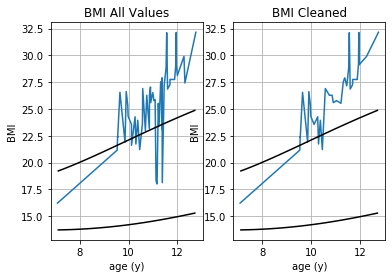

In [93]:
fig, ax = plt.subplots(1, 2)
percentile_window = bmi_percentiles.loc[(bmi_percentiles.Sex == '1') & 
                                        (bmi_percentiles.age > actual_person.age.min()) &
                                        (bmi_percentiles.age < actual_person.age.max())]
ax[0].plot(actual_person.age, actual_person.bmi)
ax[0].plot(percentile_window.age, percentile_window.P5, color='k')
ax[0].plot(percentile_window.age, percentile_window.P95, color='k')

ax[0].set(xlabel='age (y)', ylabel='BMI',
       title='BMI All Values')
ax[0].grid()

ax[1].plot(actual_person[actual_person.include_height & actual_person.include_weight].age, actual_person.loc[actual_person.include_height & actual_person.include_weight].bmi)
ax[1].plot(percentile_window.age, percentile_window.P5, color='k')
ax[1].plot(percentile_window.age, percentile_window.P95, color='k')

ax[1].set(xlabel='age (y)', ylabel='BMI',
       title='BMI Cleaned')
ax[1].grid()

plt.show()

In [94]:
all_counts = cleaned_obs.loc[cleaned_obs.param == 'WEIGHTKG'].clean_cat.value_counts()

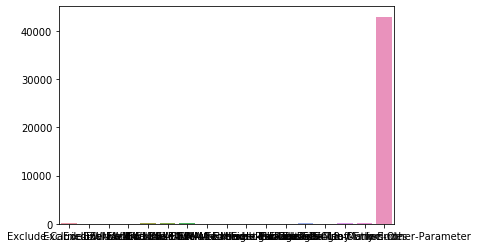

In [101]:
sns.barplot(x=all_counts.index, y=all_counts.values)